# [NLP] Assignment 1: Tokenization

In this assignment, you need to tokenize the text of the Twitter(X) users posts(tweets). The assignment consists of two tasks. When you finish all the tasks, create a GitHub repository for this assignment (you can use this repo later for the other assignments) and submit this notebook in the repository. Leave `requirements.txt` file if your code requires additional installations. Submit the link to the repository in Moodle.

The [data](https://drive.google.com/file/d/15x_wPAflvYQ2Xh38iNQGrqUIWLj5l5Nw/view?usp=share_link) contains 5 files whereby each contains 44 tweets. Each tweet is separated by a newline.

## Task 1. Tokenize some tweets manually (20 points)

As a first task you need to tokenize first 15 tweets from `file2` by hand. This will allow you to understand the problem from a linguistic point of view. The guidelines for tweet tokenization are as follows:

- Each smiley is a separate token
- Each hashtag is an individual token. Each user reference is an individual token
- If a word has spaces between them then it is converted to a single token
- All punctuations are individual tokens. This includes double-quotes and single quotes also
- A URL is a single token

Example of output

    Input tweet
    @xfranman Old age has made N A T O!

    Tokenized tweet (separated by comma)
    @xfranman , Old , age , has , made , NATO , !


    1. Input tweet
    ...
    1. Tokenized tweet
    ...

    2. Input tweet
    ...
    2. Tokenized tweet
    ...

In [12]:
with open("data/file2") as f:
    data = f.read()
data

'Camping in Maine for the weekend. Hey Dad, Mama Loves YOU: http://www.mamapalooza.com\nIts american tradition bitch\n@ThroughTheVoid They love it! The only pleasure they get in life. I actually do that. I\'m sure I hear a tiny squeak... Then louder ones\n" RT @latti: @AbsoHilare stop tweeting in church! Lol <--- ""I tweet because I\'m happy, I tweet because I\'m free"" LOL!"\nSamsung Mini S2 portable HDD graced with colors that perfectly match your tacky beach gear: Sammy\'s done it aga.. http://tinyurl.com/lb5p6m\n@dialloc congrats on finding your way over. it may be slow going at first. hang in there. it\'s kinda cool when u get up to speed.\niPhone activation delays continue, Apple offers $30 http://twt.gs/l3Ki\nRT @GoogleAtWork Gmail maximum attachment size now 25MB http://bit.ly/62mjw Nice!!!\nRT @acfou The Ads Won Awards for Crispin; But Did Nothing for Client BurgerKing\'s Sales/Marketshare - Big Surprise - http://ping.fm/vw8TI\nHey doll! Great I missed True Blood yday boo lol 

In [13]:
data = data.split("\n")
data[1]

'Its american tradition bitch'

In [48]:
data15 = data[:15]

In [46]:
import re
from typing import List

def tweet_tokenize(text: str) -> List[str]:
    '''Applies for tweets tokenization'''
    words = text.split()
    tokens = []
    for word in words:
        if re.match("^[a-z]+[!\"$%&'()*+,-./:;<=>?[\]^_`{|}~]+$", word, re.IGNORECASE) is not None:
            letters = re.findall('^[a-z]+', word, flags=re.IGNORECASE)
            punct = re.findall("[!\"$%&'()*+,-./:;<=>?[\]^_`{|}~]+$", word)
            tokens.append(letters[0])
            tokens.append(punct[0])
        else: tokens.append(word)
    return tokens

print(tweet_tokenize(data15[2]))

['@ThroughTheVoid', 'They', 'love', 'it', '!', 'The', 'only', 'pleasure', 'they', 'get', 'in', 'life', '.', 'I', 'actually', 'do', 'that', '.', "I'm", 'sure', 'I', 'hear', 'a', 'tiny', 'squeak', '...', 'Then', 'louder', 'ones']


In [49]:
for i, tweet in enumerate(data15):
    data15[i] = tweet_tokenize(tweet)
    print(data15[i])

['Camping', 'in', 'Maine', 'for', 'the', 'weekend', '.', 'Hey', 'Dad', ',', 'Mama', 'Loves', 'YOU', ':', 'http://www.mamapalooza.com']
['Its', 'american', 'tradition', 'bitch']
['@ThroughTheVoid', 'They', 'love', 'it', '!', 'The', 'only', 'pleasure', 'they', 'get', 'in', 'life', '.', 'I', 'actually', 'do', 'that', '.', "I'm", 'sure', 'I', 'hear', 'a', 'tiny', 'squeak', '...', 'Then', 'louder', 'ones']
['"', 'RT', '@latti:', '@AbsoHilare', 'stop', 'tweeting', 'in', 'church', '!', 'Lol', '<---', '""I', 'tweet', 'because', "I'm", 'happy', ',', 'I', 'tweet', 'because', "I'm", 'free', '""', 'LOL', '!"']
['Samsung', 'Mini', 'S2', 'portable', 'HDD', 'graced', 'with', 'colors', 'that', 'perfectly', 'match', 'your', 'tacky', 'beach', 'gear', ':', "Sammy's", 'done', 'it', 'aga', '..', 'http://tinyurl.com/lb5p6m']
['@dialloc', 'congrats', 'on', 'finding', 'your', 'way', 'over', '.', 'it', 'may', 'be', 'slow', 'going', 'at', 'first', '.', 'hang', 'in', 'there', '.', "it's", 'kinda', 'cool', 'when'

## Task 2. Implement [Byte-Pair Encoding(BPE)](https://arxiv.org/pdf/1508.07909.pdf) Tokenizer (80 points)

### Task 2.1. Implementation (60 points)

Implement the tokenizer as the BPETokenizer class:
* Implement `train` method that learns merges and builds the vocabulary of the specified `vocab_size` (25 points).
* Implement `tokenize` method that should tokenize the text according to the learnt merges (25 points).

Your code should have docstrings and comments (10 points).

In [211]:
# https://huggingface.co/learn/nlp-course/en/chapter6/5
from typing import List, Dict
import collections

class BPETokenizer:

    def __init__(self, vocab_size: int) -> None:
        self.vocab_size = vocab_size
        self.merges = {}
    

    def create_vocab(self) -> None:
        '''Creates self.vocab formed by all unique characters used in the corpus and self.splits - individual characters'''
        alphabet = []

        for word in self.word_freqs.keys():
            for letter in word:
                if letter not in alphabet:
                    alphabet.append(letter)
        alphabet.sort()

        self.vocab = ["/w"] + alphabet.copy()
        self.splits = {word: [c for c in word] for word in self.word_freqs.keys()}
        

    def get_word_freqs(self, corpus: List[str]) -> collections.Counter[str]:
        '''Computes the frequencies of each word in the corpus'''
        word_freqs = collections.Counter(corpus)

        return word_freqs


    def get_stats(self) -> Dict[List[str], int]:
        '''Computes the frequency of each pair'''
        pairs = collections.defaultdict(int)

        for word, freq in self.word_freqs.items():
            symbols = self.splits[word]
            if len(symbols) == 1:
                continue

            for i in range(len(symbols) - 1):
                pairs[symbols[i], symbols[i+1]] += freq

        return pairs
    

    def merge_pair(self, pair: List[str]) -> Dict[str, List[str]]:
        '''Merges the most frequent pair in self.splits dictionary'''
        for word in self.word_freqs:
            symbols = self.splits[word]
            if len(symbols) == 1:
                continue

            i = 0
            while i < len(symbols) - 1:
                if symbols[i] == pair[0] and symbols[i + 1] == pair[1]:
                    symbols = symbols[:i] + [pair[0] + pair[1]] + symbols[i + 2 :]
                else:
                    i += 1
            self.splits[word] = symbols

        return self.splits


    def train(self, corpus: List[str]) -> None:
        '''Learns merging rules'''
        self.word_freqs = self.get_word_freqs(corpus)
        self.create_vocab()

        while len(self.vocab) < self.vocab_size:
            pairs = self.get_stats()
            best_pair = max(pairs, key=pairs.get)
            splits = self.merge_pair(best_pair)

            self.merges[best_pair] = best_pair[0] + best_pair[1]
            self.vocab.append(best_pair[0] + best_pair[1])


    def tokenize(self, text):
        '''Applies all the learned merge rules'''
        splits = [[l for l in word] for word in text]
        for pair, merge in self.merges.items():
            for idx, split in enumerate(splits):
                i = 0
                while i < len(split) - 1:
                    if split[i] == pair[0] and split[i + 1] == pair[1]:
                        split = split[:i] + [merge] + split[i + 2 :]
                    else:
                        i += 1
                splits[idx] = split

        return sum(splits, [])

### Task 2.2. Analysis on Tweets Dataset (10 points)

Train the BPE tokenizer on the tweets dataset. Try to tokenize the tweets with the tokenizer of different `vocab_size`. For example, train the BPE tokenizer with `vocab_size` of [base_vocab_size, 250, 500, 750, 1000]. Plot the dependency of the average length of the tokenized tweet by `vocab_size` to analyze how `vocab_size` affects the length of the tokenized tweet on average. Tell what `vocab_size` is preferrable and why.

In [212]:
with open("data/file1") as f:
    data1 = f.read().split("\n")
with open("data/file2") as f:
    data2 = f.read().split("\n")
with open("data/file3") as f:
    data3 = f.read().split("\n")
with open("data/file4") as f:
    data4 = f.read().split("\n")
with open("data/file5") as f:
    data5 = f.read().split("\n")

In [213]:
data = data1 + data2 + data3 + data4 + data5
len(data)

225

In [217]:
vocab_sizes = [250, 500, 750, 1000]
avg_lens = []
for size in vocab_sizes:
    tokenizer = BPETokenizer(size)
    tokenizer.train(data)
    avg_len_for_size = 0
    for tweet in data:
        result = tokenizer.tokenize(tweet)
        avg_len_for_size += len(result)
    avg_lens.append(avg_len_for_size / size)

In [218]:
print(tokenizer.tokenize(data15[0]))

['C', 'amp', 'ing', 'in', 'M', 'ain', 'e', 'for', 'the', 'w', 'ee', 'k', 'end', '.', 'H', 'ey', 'D', 'ad', ',', 'M', 'am', 'a', 'Lov', 'es', 'Y', 'O', 'U', ':', 'http://www.', 'm', 'am', 'ap', 'al', 'oo', 'z', 'a', '.com']


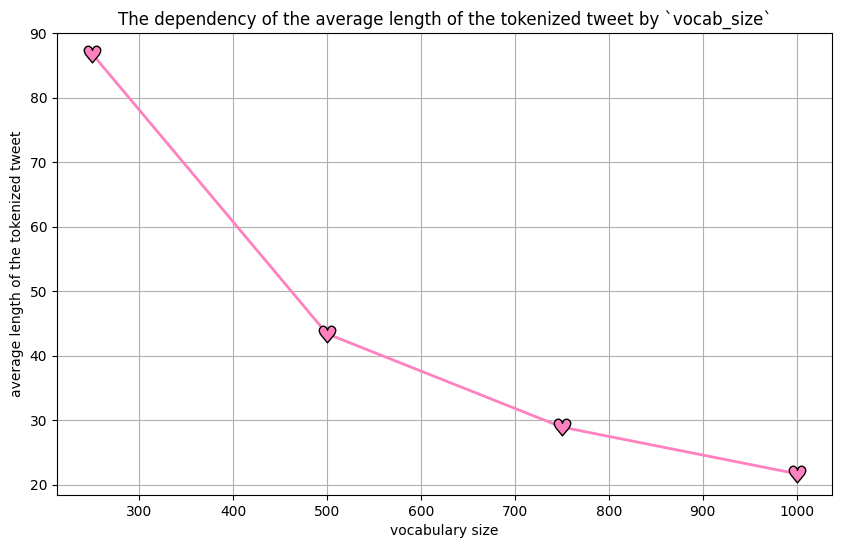

In [118]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.plot(vocab_sizes, avg_lens, '-', marker="$♥$", markersize=12, color = '#FF81C0', markeredgecolor='black', linewidth=2)
plt.title("The dependency of the average length of the tokenized tweet by `vocab_size`")
plt.xlabel("vocabulary size")
plt.ylabel("average length of the tokenized tweet")
plt.grid(True)
plt.show()

### Task 2.3. Analysis on Dataset of Different Language (10 points)

Find a small dataset of texts in a language other than English. The dataset size should be not greater than several megabytes.

Train the BPE tokenizer on the dataset that you found. Try to tokenize the sentences from this dataset with the tokenizer of different `vocab_size`. Plot the dependency of the average length of the tokenized sentence by `vocab_size` to analyze how `vocab_size` affects the length of the tokenized sentence on average.

Tell how how the average length of the tokenized sentence differs from the average length of the tokenized tweet. Explain why. 

In [146]:
import pandas as pd 

deutsch_data = pd.read_csv("Amazon-Deutsch-Dataset\Amazon-Deutsch-Dataset.csv", index_col=0)
deutsch_data.head()

,web-scraper-order,web-scraper-start-url,author,title,date,content,rating,next,next-href,Unnamed: 9
0,1582056286-2631,https://www.amazon.de/Apple-iPhone-11-128-GB-S...,MHS,Das Beste iPhone aller Zeiten,5. Januar 2020,Ich bin sehr zufrieden mit dem iPhone 11. Der ...,"5,0 von 5 Sternen",Weiter→,https://www.amazon.de/Apple-iPhone-11-128-GB-S...,NaN
1,1582056184-2351,https://www.amazon.de/Apple-iPhone-11-128-GB-S...,Amazon Customer,besser als beim hersteller,21. September 2019,"gestern bestellt, heute geliefert. besser geht...","5,0 von 5 Sternen",NaN,NaN,NaN
2,1582056243-2561,https://www.amazon.de/Apple-iPhone-11-128-GB-S...,Joko Müller,Gutes Handy mit kleinen Schwächen,27. Oktober 2019,"Ich mach es mal kurz:\nGut: Optik, Verarbeitun...","4,0 von 5 Sternen",Weiter→,https://www.amazon.de/Apple-iPhone-11-128-GB-S...,NaN
3,1582056201-2410,https://www.amazon.de/Apple-iPhone-11-128-GB-S...,Davorko,Ein sehr edles Stück dieses IPHONE 11,2. Januar 2020,Amazon hat wieder super-schnell geliefert. Dan...,"5,0 von 5 Sternen",Weiter→,https://www.amazon.de/Apple-iPhone-11-128-GB-S...,NaN
4,1582056246-2585,https://www.amazon.de/Apple-iPhone-11-128-GB-S...,Chiara Natalia Sozzi,Super,18. Oktober 2019,"Viel früher angekommen als angegeben, tolles H...","5,0 von 5 Sternen",Weiter→,https://www.amazon.de/Apple-iPhone-11-128-GB-S...,NaN


In [155]:
deutsch_text = deutsch_data['content'].dropna()
deutsch_text = list(deutsch_text)
deutsch_text[:5]

['Ich bin sehr zufrieden mit dem iPhone 11. Der Wechsel vom iPhone 6s war ein riesiger Quantensprung, der sich allerdings gelohnt hat. Ich würde es jederzeit wieder kaufen.',
 'gestern bestellt, heute geliefert. besser gehts nicht. und rot sieht einfach spitze aus.',
 'Ich mach es mal kurz:\nGut: Optik, Verarbeitung, Betriebssystem, Kamera\nNicht so gut: Gewicht und Akkulaufzeit',
 'Amazon hat wieder super-schnell geliefert. Danke dafür. Das Iphone 11 ist soweit ich es bis heute beurteilen kann, das beste Produkt aus der IPHONE-Reihe seit Jahren. Die Kamera liefert fantastische Bilder, das Handy liegt gut in der Hand. Nur der Preis könnte etwas günstiger sein, aber da sind wir bei Apple daran schon gewohnt. Kann dieses Iphone uneingeschränkt jedem empfehlen. Kauft bei Amazon, da habt ihr ohnehin das beste Kundenservice ever.',
 'Viel früher angekommen als angegeben, tolles Handy hatte ein xr muss aber sagen das 11 hat eine viel bessere Camera schneller und tolle Farben im Angebot.']

In [148]:
print(len(deutsch_text))

3409


In [243]:
deutsch_strings = []
for i, text in enumerate(deutsch_text):
    deutsch_strings.extend(text.split("\n"))
print(len(deutsch_strings))

10987


In [219]:
deutsch500 = deutsch_strings[:500]
deutsch500[0]

'Ich bin sehr zufrieden mit dem iPhone 11. Der Wechsel vom iPhone 6s war ein riesiger Quantensprung, der sich allerdings gelohnt hat. Ich würde es jederzeit wieder kaufen.'

In [226]:
vocab_sizes = [250, 500, 750, 1000]
avg_lens = []
for size in vocab_sizes:
    deutsch_tokenizer = BPETokenizer(size)
    deutsch_tokenizer.train(deutsch_strings)
    avg_len_for_size = 0
    for s in deutsch_strings:
        result = deutsch_tokenizer.tokenize(s)
        avg_len_for_size += len(result)
    avg_lens.append(avg_len_for_size / size)

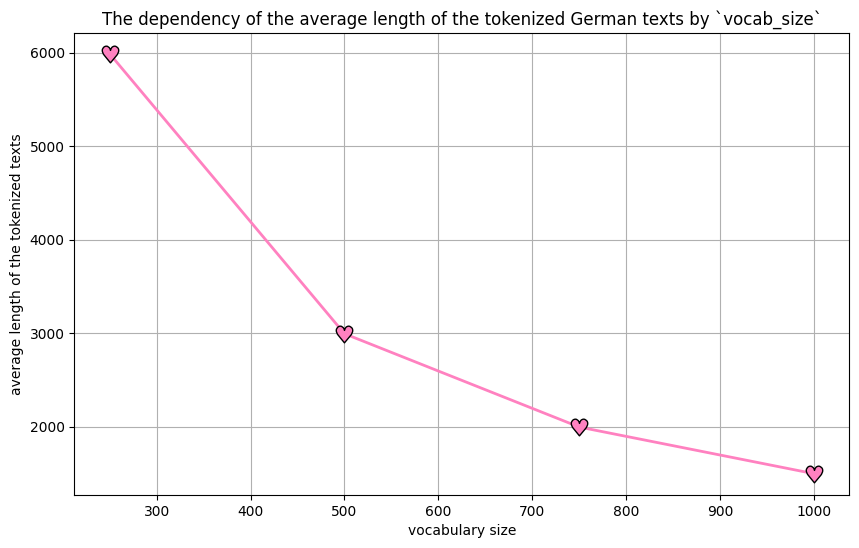

In [229]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.plot(vocab_sizes, avg_lens, '-', marker="$♥$", markersize=12, color = '#FF81C0', markeredgecolor='black', linewidth=2)
plt.title("The dependency of the average length of the tokenized German texts by `vocab_size`")
plt.xlabel("vocabulary size")
plt.ylabel("average length of the tokenized texts")
plt.grid(True)
plt.show()

Both graphs show that as vocabulary size increases, the average length of tokenized text decreases. However, we can observe that in the graph with German data the average length is several times larger. Such a difference may be due to the fact that the size of the second dataset is also several times larger than the first one, so the number of different words is several times greater. Therefore, the second tokenizer is more difficult to train and requires more iteration to learn more words.